<a href="https://colab.research.google.com/github/fauzularianto/BDPAL/blob/main/Klasifikasi_Kualitas_Udara_Kelompok_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from google.colab import drive

!gdown --id 1ehtXoeGuGo9DC8YjvzsFfigoA8FNWQe-
df = pd.read_csv('pollution_dataset.csv')

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ehtXoeGuGo9DC8YjvzsFfigoA8FNWQe-
To: /content/pollution_dataset.csv
100% 242k/242k [00:00<00:00, 83.2MB/s]


In [7]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [8]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


#Preprocessing Data

**Nulls Cleaning**

In [10]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


**Negative Value Cleaning**

In [11]:
negative_values = df[df.select_dtypes(include=['number']) < 0].count()
negative_values

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,1
NO2,0
SO2,30
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


In [12]:
numeric_cols = df.select_dtypes(include=['number']).columns
negative_data = df[df[numeric_cols].lt(0).any(axis=1)]
negative_data.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
22,25.6,58.3,0.4,-0.2,25.3,4.5,0.98,10.0,536,Good
57,29.0,83.5,31.5,44.4,27.0,-2.8,1.49,5.7,538,Moderate
166,29.3,78.5,14.8,19.2,29.3,-0.4,1.48,8.0,451,Moderate
205,25.9,64.2,1.5,10.3,23.6,-0.4,0.93,11.5,386,Good
351,24.3,44.2,9.5,12.5,18.8,-0.2,0.83,10.6,341,Good


In [13]:
for col in numeric_cols:
    df[col] = df[col].abs()

negative_values_after_cleaning = df[df.select_dtypes(include=['number']) < 0].count()
negative_values_after_cleaning

,0
Temperature,0
Humidity,0
PM2.5,0
PM10,0
NO2,0
SO2,0
CO,0
Proximity_to_Industrial_Areas,0
Population_Density,0
Air Quality,0


**Target Feature Arrangement**

In [14]:
air_quality_order = ["Good", "Moderate", "Poor", "Hazardous"]
df['Air Quality'] = pd.Categorical(df['Air Quality'], categories=air_quality_order, ordered=True)

#Exploratory Data Analytics

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

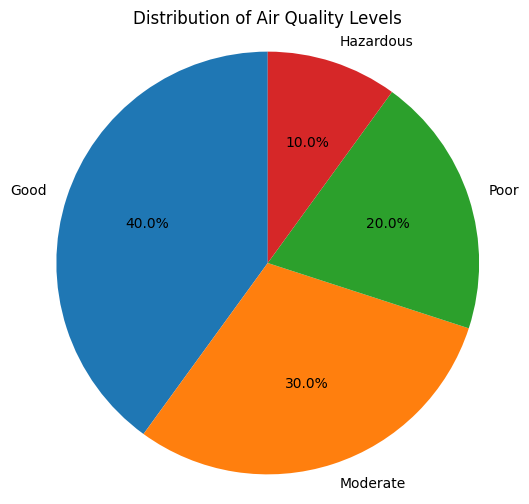

In [16]:
air_quality_counts = df['Air Quality'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(air_quality_counts, labels=air_quality_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Air Quality Levels')
plt.axis('equal')
plt.show()

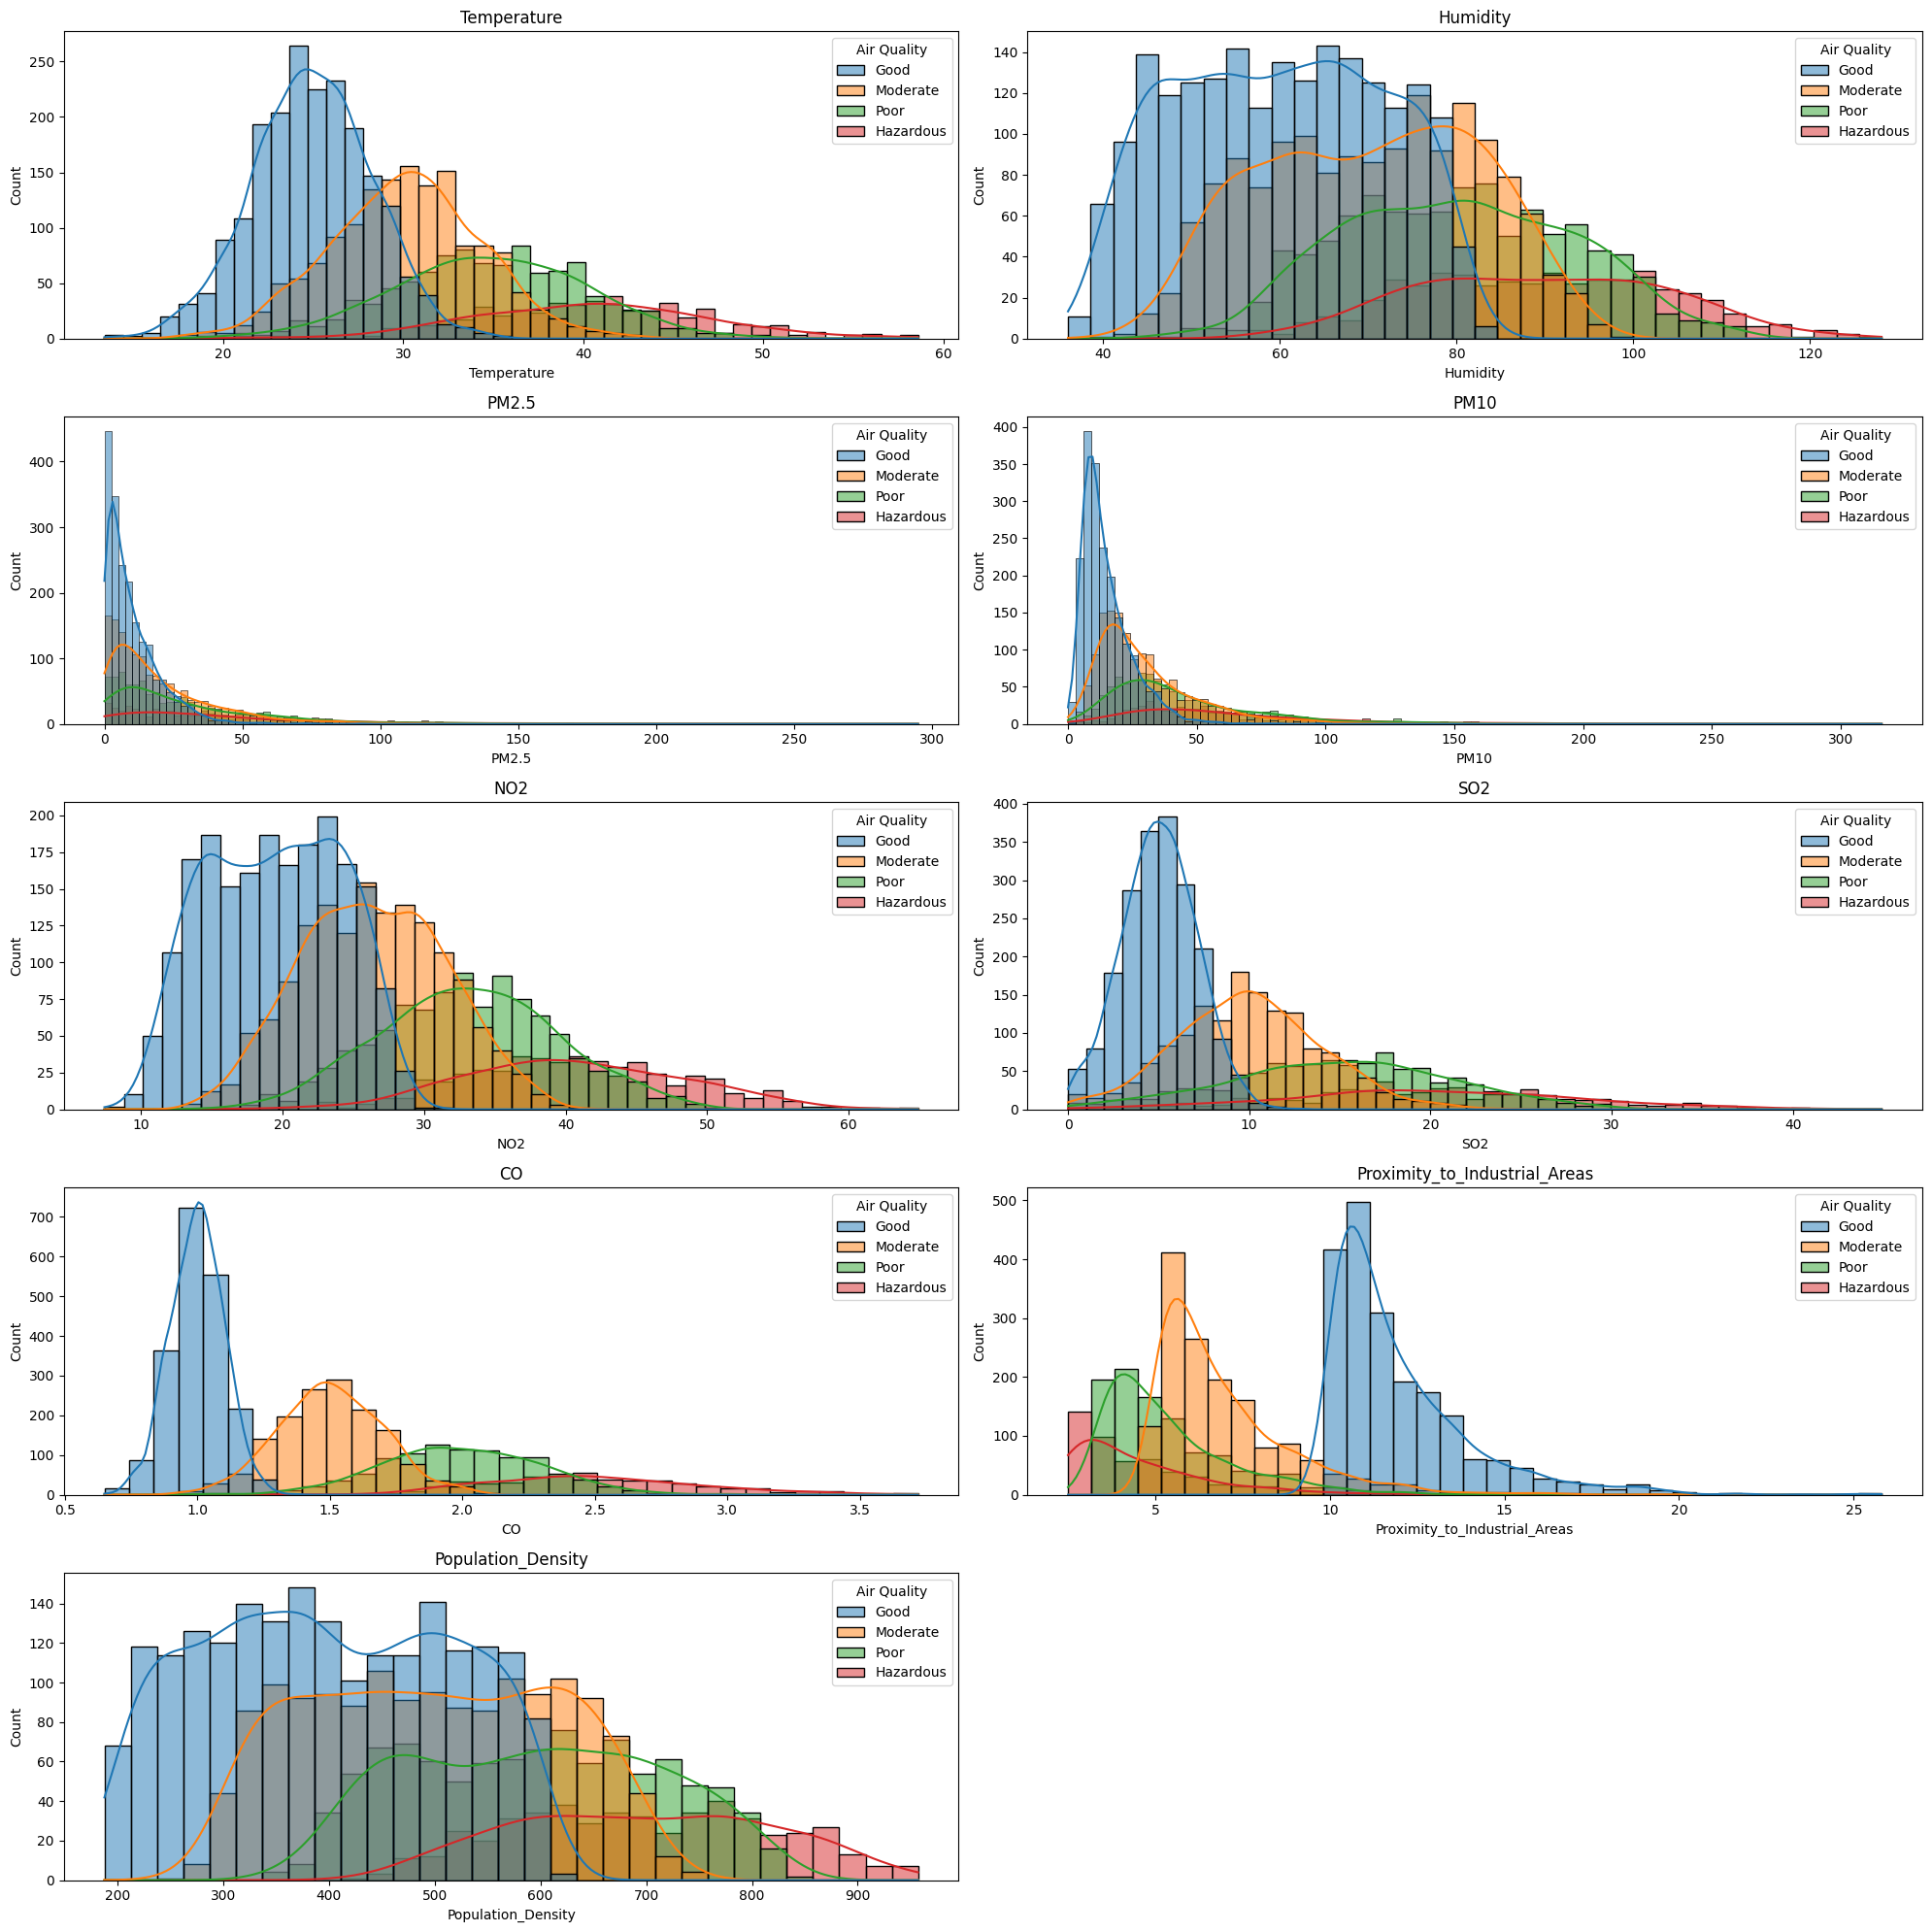

In [17]:
fig = plt.figure(figsize=(20, 20))

num_cols_to_plot = len(df.drop('Air Quality', axis=1).columns)
num_rows = math.ceil(num_cols_to_plot / 2)

for i, col in enumerate(df.drop('Air Quality', axis=1).columns):
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(x=df[col], hue=df['Air Quality'], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

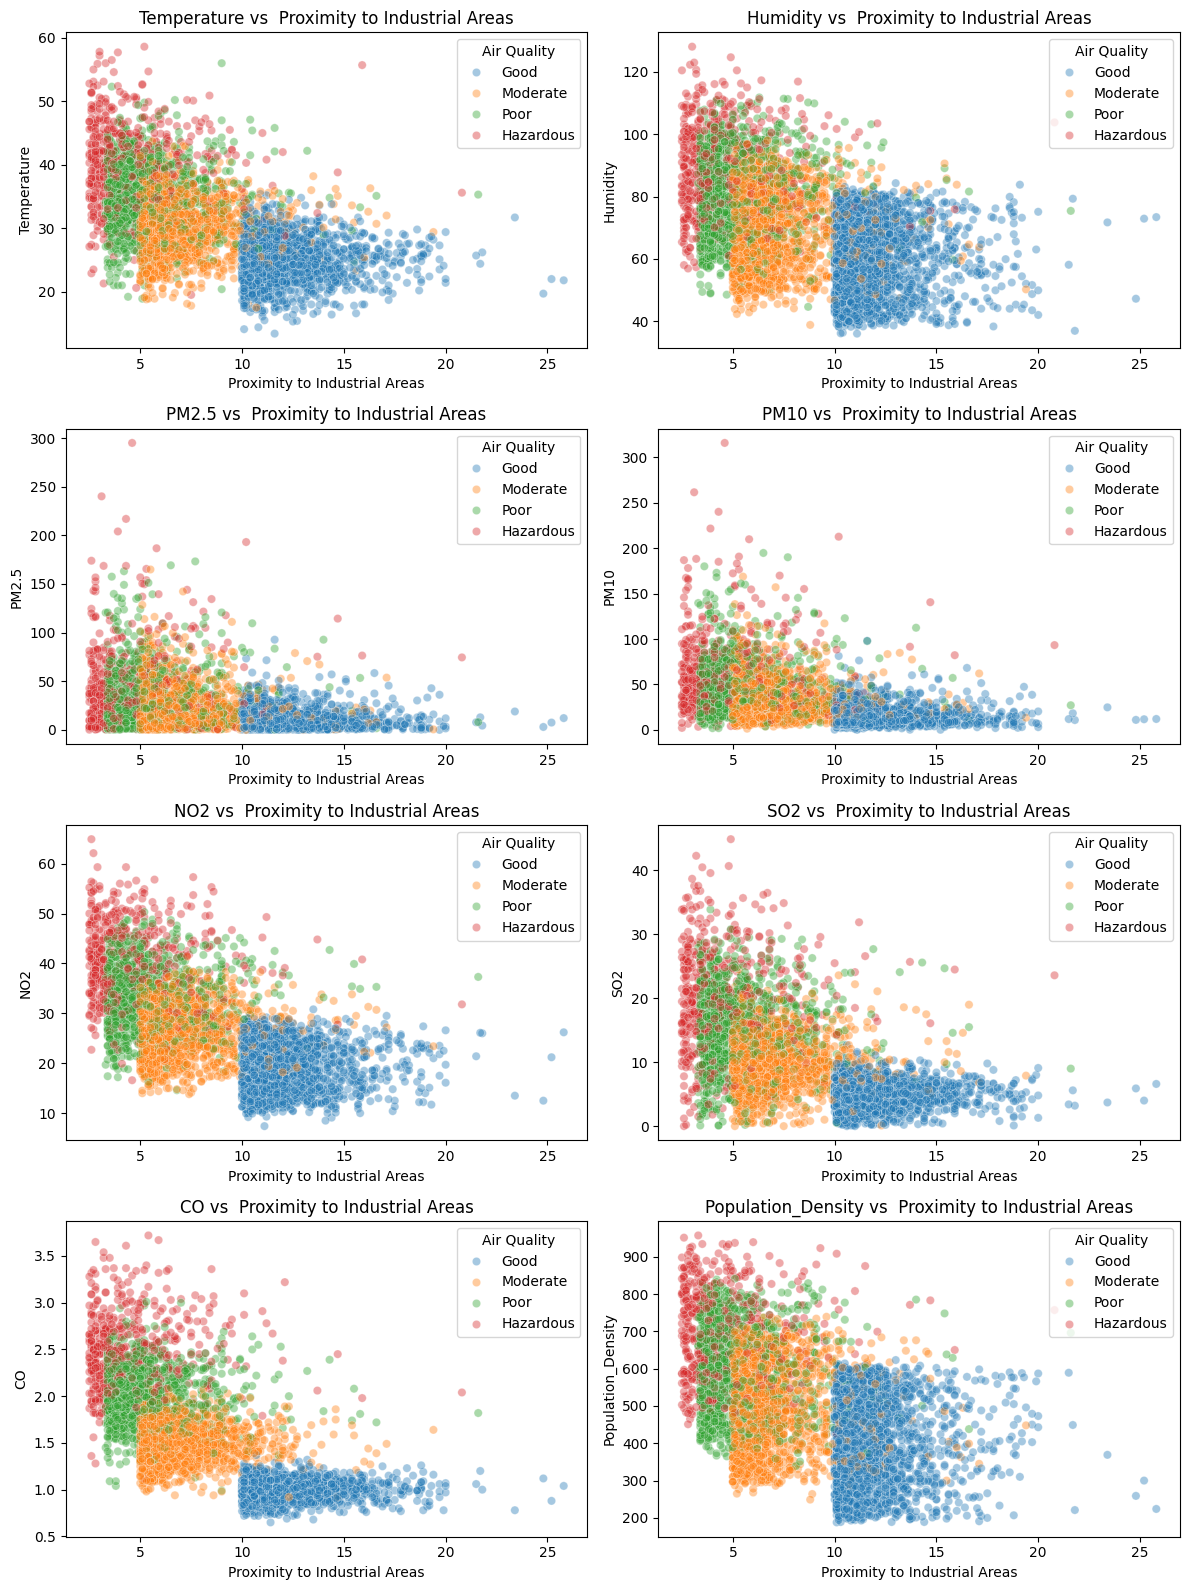

In [18]:
num_cols = 2
drop_plot = df.drop(['Air Quality', 'Proximity_to_Industrial_Areas'], axis=1).columns
num_plots = len(drop_plot)
num_rows = math.ceil(num_plots / num_cols)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
axes = axes.flatten()

for i, col in enumerate(drop_plot):
    sns.scatterplot(data=df, y=col, x='Proximity_to_Industrial_Areas', alpha=0.4, ax=axes[i], hue='Air Quality')
    axes[i].set_title(f'{col} vs  Proximity to Industrial Areas')
    axes[i].set_xlabel('Proximity to Industrial Areas')
    axes[i].set_ylabel(col)

for j in range(num_plots, num_rows * num_cols):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

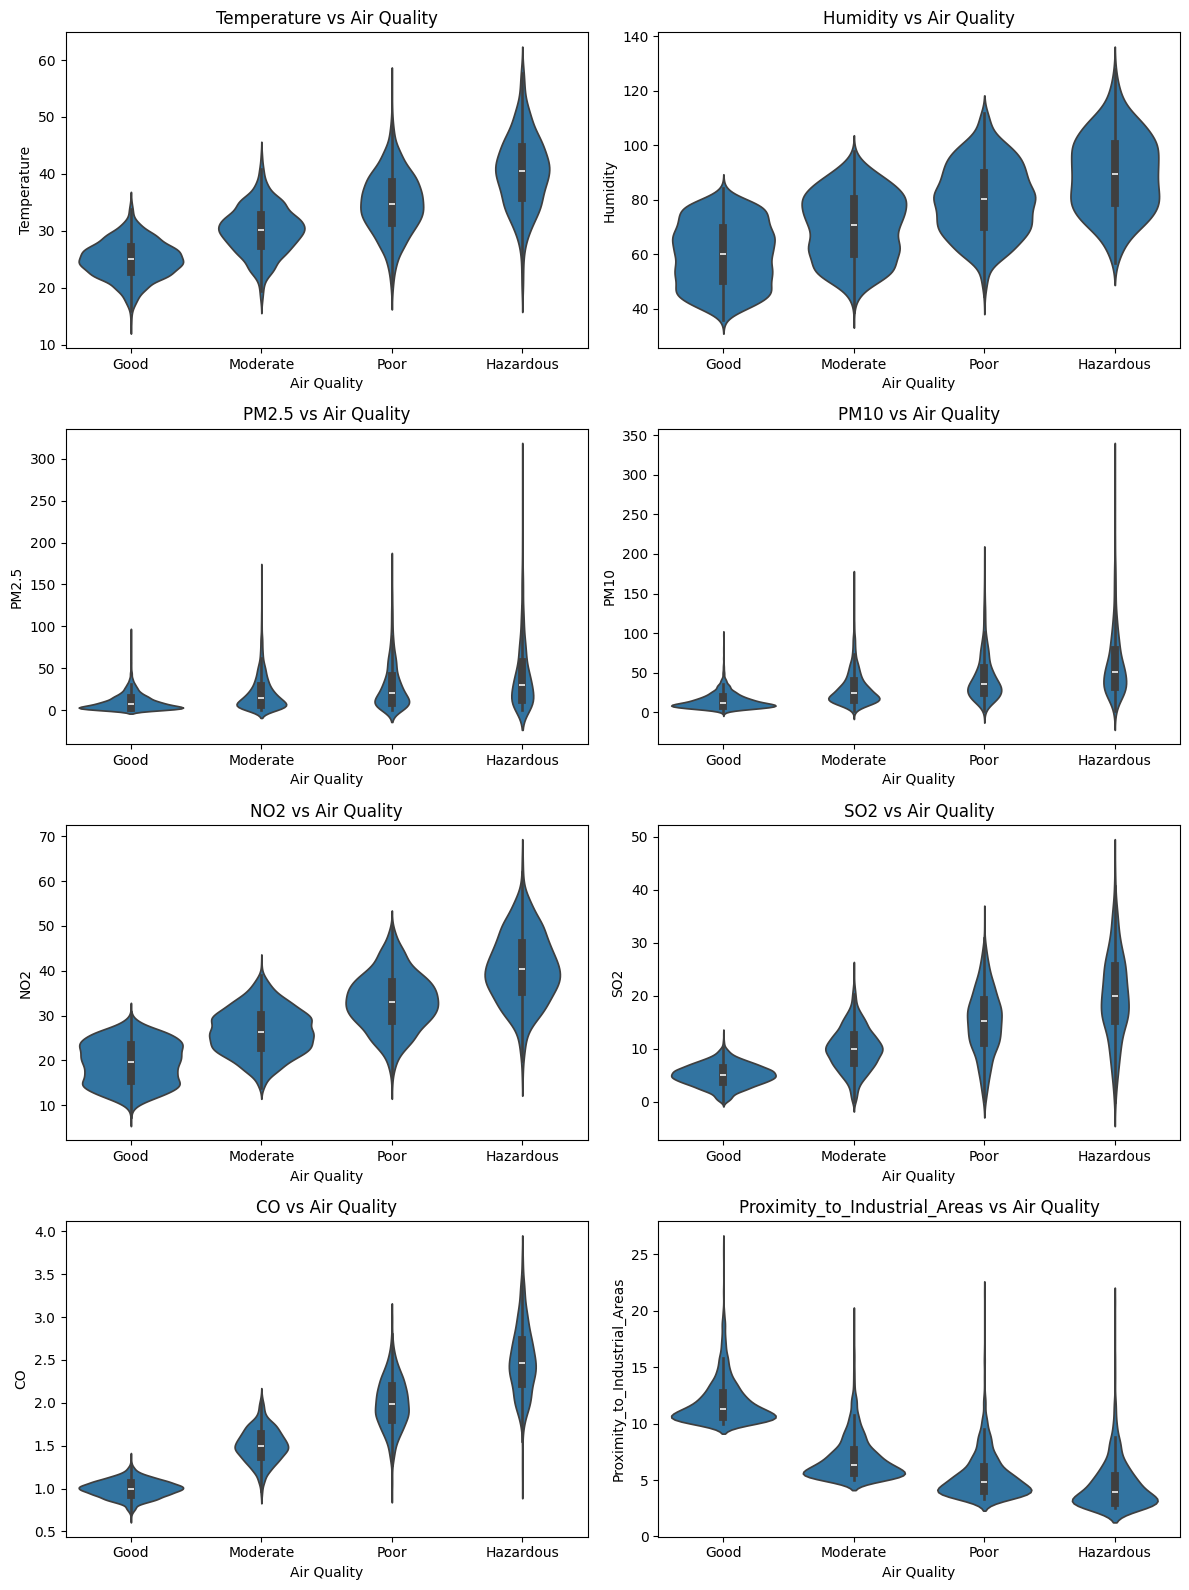

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get the list of columns to plot (excluding 'Air Quality' and 'Population_Density')
features_to_plot = df.drop(columns=['Air Quality', 'Population_Density']).columns

# Calculate the number of rows and columns for subplots
num_cols = 2  # Number of columns in the subplot grid
num_plots = len(features_to_plot)
num_rows = math.ceil(num_plots / num_cols)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate through the features and create violin plots
for i, feature in enumerate(features_to_plot):
    sns.violinplot(data=df, x='Air Quality', y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} vs Air Quality')
    axes[i].set_xlabel('Air Quality')
    axes[i].set_ylabel(feature)

# Hide any extra subplots if there are more subplot spaces than features
for j in range(num_plots, num_rows * num_cols):
    axes[j].set_visible(False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

#Data Processing

In [20]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

**Feature Correlation**

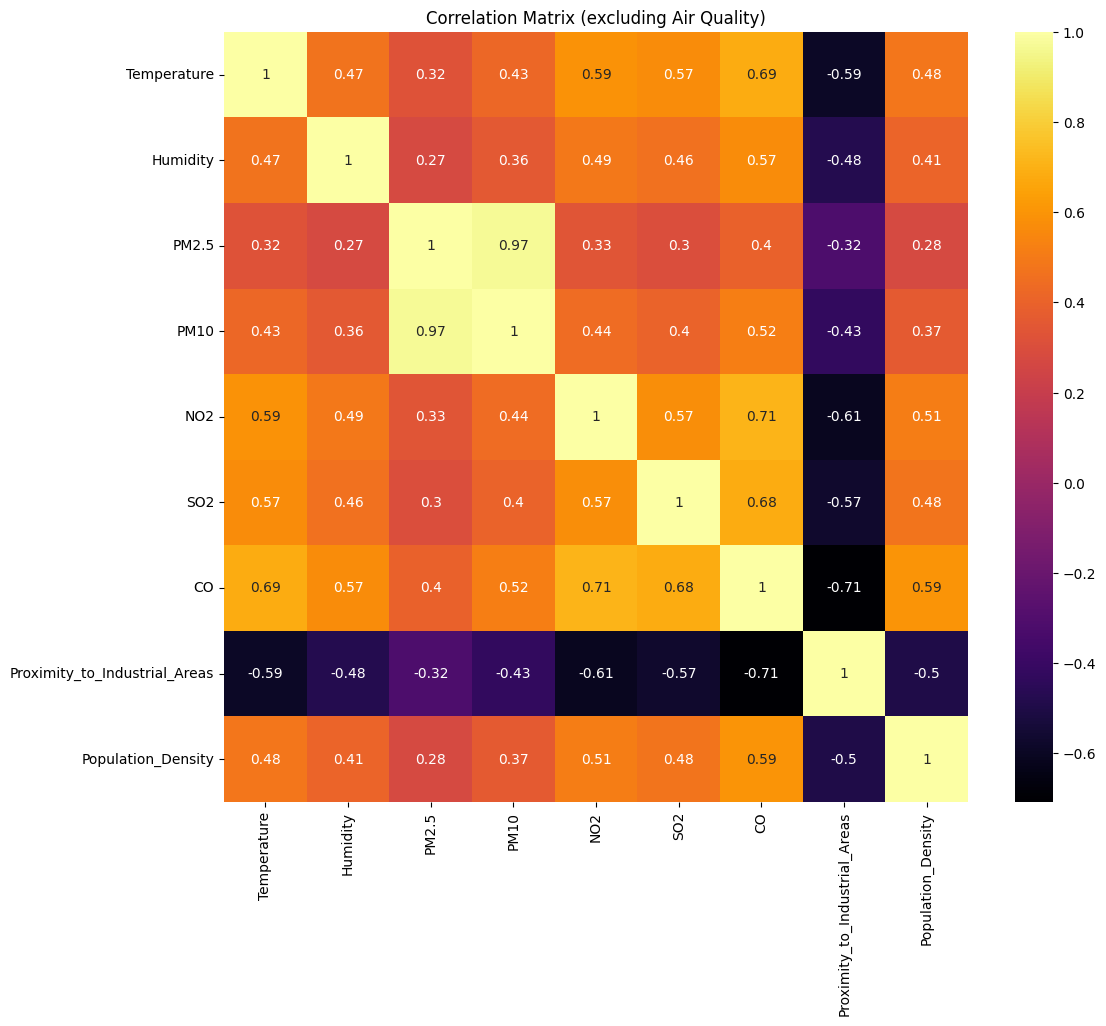

In [21]:
correlation_columns = df.drop(columns=['Air Quality']).columns
correlation_matrix = df[correlation_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno')
plt.title('Correlation Matrix (excluding Air Quality)')
plt.show()

**Feature Combine**

In [22]:
df['PM_Avg'] = df[['PM2.5', 'PM10']].mean(axis=1)
df = df.drop(columns=['PM2.5', 'PM10'])

cols = df.columns.tolist()
humidity_index = cols.index('Humidity')
pm_avg_index = cols.index('PM_Avg')
cols.pop(pm_avg_index)
cols.insert(humidity_index + 1, 'PM_Avg')
df = df[cols]

**Log Transformation**

In [23]:
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer

df['PM_Avg_Log'] = np.log1p(df['PM_Avg'])
df.head()

,Temperature,Humidity,PM_Avg,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,PM_Avg_Log
0,29.8,59.1,11.55,18.9,9.2,1.72,6.3,319,Moderate,2.529721
1,28.3,75.6,7.25,30.8,9.7,1.64,6.0,611,Moderate,2.110213
2,23.1,74.7,30.25,24.4,12.6,1.63,5.2,619,Moderate,3.442019
3,27.1,39.1,6.20,13.5,5.3,1.15,11.1,551,Good,1.974081
4,26.5,70.7,11.45,21.9,5.6,1.01,12.7,303,Good,2.521721


**Feature Replacement**

In [24]:
df['PM_Avg'] = df['PM_Avg_Log']
df = df.drop(columns=['PM_Avg_Log'])

In [25]:
df.head()

,Temperature,Humidity,PM_Avg,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,2.529721,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.110213,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,3.442019,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,1.974081,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,2.521721,21.9,5.6,1.01,12.7,303,Good


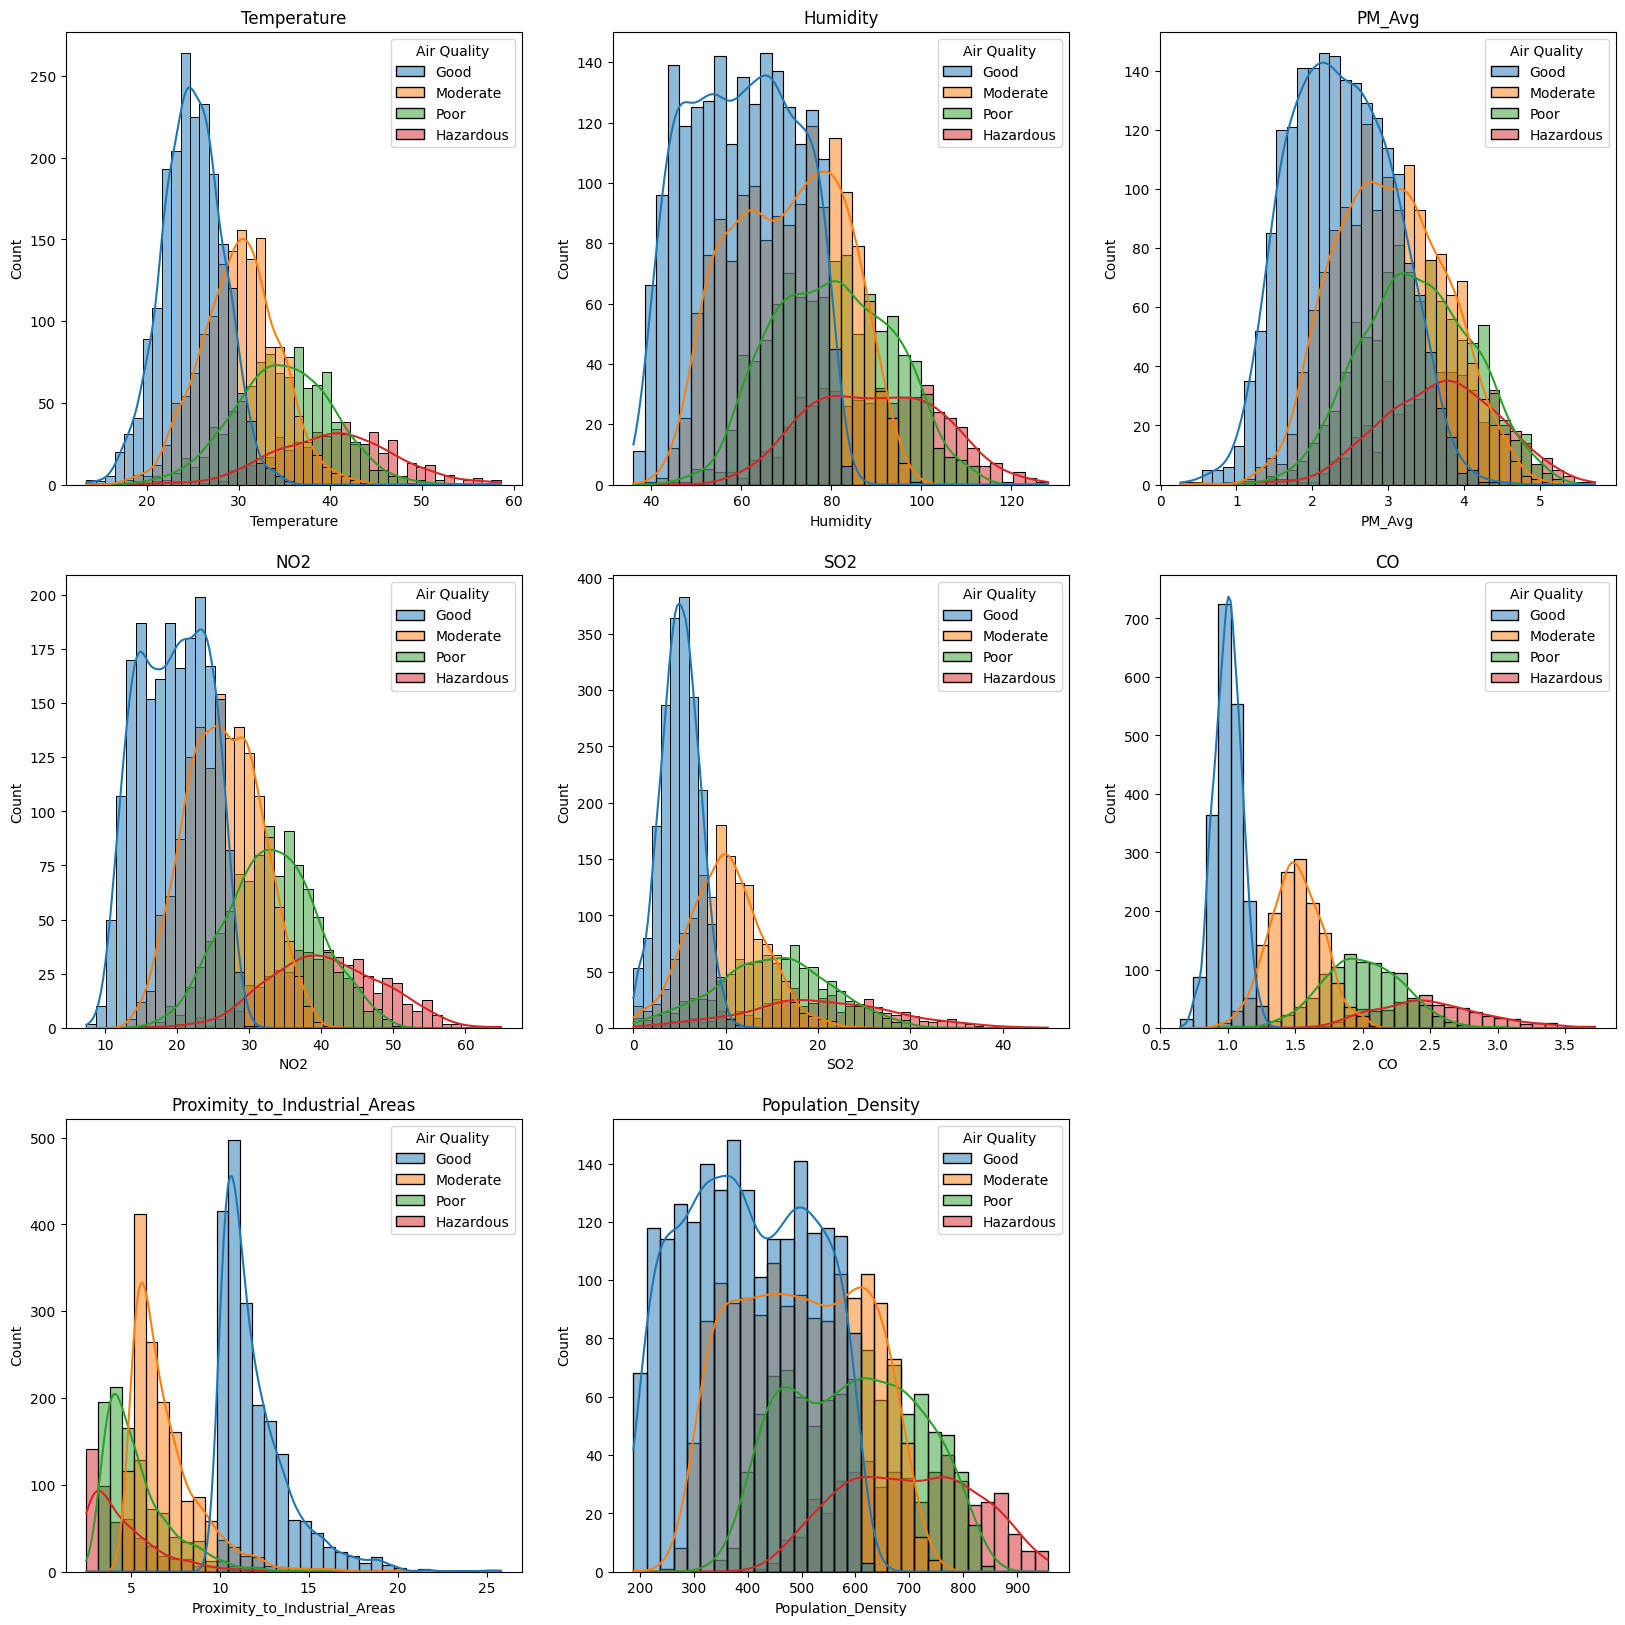

In [26]:
fig = plt.figure(figsize=(20,20))

for i, col in enumerate(df.drop('Air Quality', axis=1).columns):
  plt.subplot(3,3,i+1)
  sns.histplot(x = df[col], hue=df['Air Quality'], kde=True)
  plt.title(col)

In [27]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

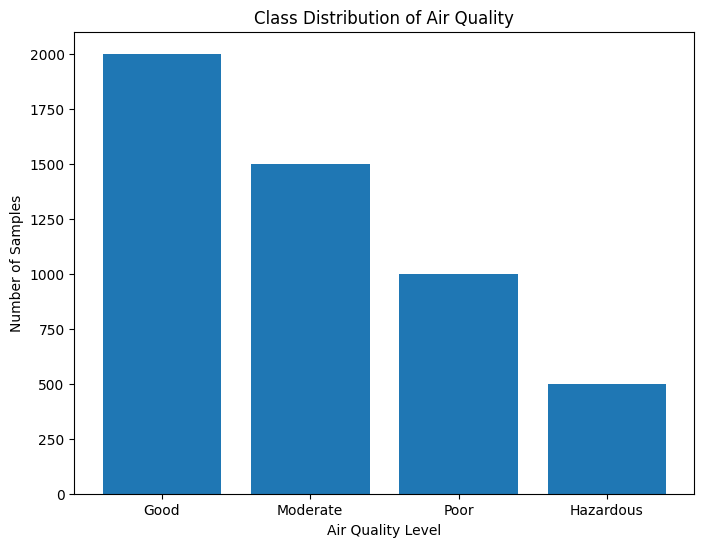

,count
Air Quality,
Good,40.0
Moderate,30.0
Poor,20.0
Hazardous,10.0


In [28]:
import matplotlib.pyplot as plt

air_quality_counts = df['Air Quality'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(air_quality_counts.index, air_quality_counts.values)
plt.xlabel("Air Quality Level")
plt.ylabel("Number of Samples")
plt.title("Class Distribution of Air Quality")
plt.show()

class_percentages = (air_quality_counts / len(df)) * 100
class_percentages

**SMOTE**

Air Quality
Good         2000
Moderate     2000
Poor         2000
Hazardous    2000
Name: count, dtype: int64


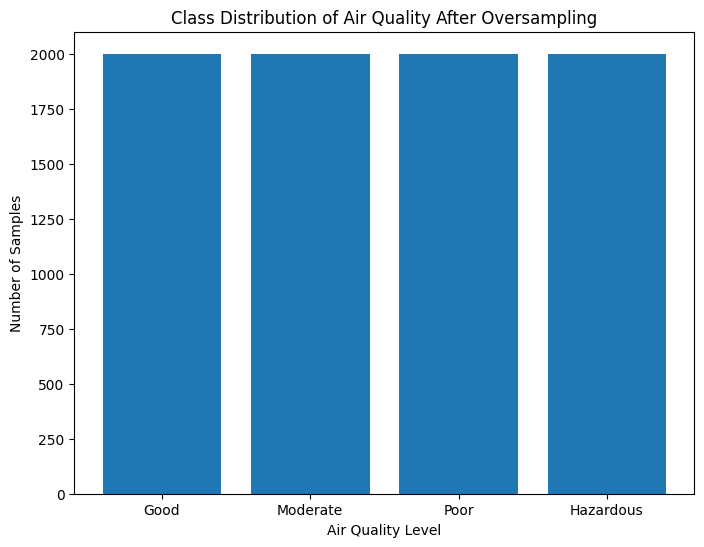

In [29]:
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

X = df.drop('Air Quality', axis=1)
y = df['Air Quality']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Air Quality'] = y_resampled

air_quality_counts_resampled = df_resampled['Air Quality'].value_counts()
print(air_quality_counts_resampled)

plt.figure(figsize=(8, 6))
plt.bar(air_quality_counts_resampled.index, air_quality_counts_resampled.values)
plt.xlabel("Air Quality Level")
plt.ylabel("Number of Samples")
plt.title("Class Distribution of Air Quality After Oversampling")
plt.show()

**Data Mapping**

In [30]:
air_quality_mapping = {"Good": 0, "Moderate": 1, "Poor": 2, "Hazardous": 3}
df_resampled['Air Quality'] = df_resampled['Air Quality'].map(air_quality_mapping)
df_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   Temperature                    8000 non-null   float64 
 1   Humidity                       8000 non-null   float64 
 2   PM_Avg                         8000 non-null   float64 
 3   NO2                            8000 non-null   float64 
 4   SO2                            8000 non-null   float64 
 5   CO                             8000 non-null   float64 
 6   Proximity_to_Industrial_Areas  8000 non-null   float64 
 7   Population_Density             8000 non-null   int64   
 8   Air Quality                    8000 non-null   category
dtypes: category(1), float64(7), int64(1)
memory usage: 508.1 KB


In [31]:
df_resampled.head()

,Temperature,Humidity,PM_Avg,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,2.529721,18.9,9.2,1.72,6.3,319,1
1,28.3,75.6,2.110213,30.8,9.7,1.64,6.0,611,1
2,23.1,74.7,3.442019,24.4,12.6,1.63,5.2,619,1
3,27.1,39.1,1.974081,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,2.521721,21.9,5.6,1.01,12.7,303,0


#Machine Learning Model

In [32]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

**Data Split**

In [33]:
x = df_resampled.drop('Air Quality', axis=1)
y = df_resampled['Air Quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(5600, 8) (5600,) (2400, 8) (2400,)



Random Forest
Accuracy: 0.9704166666666667
Precision: 0.9708253118566296
Recall: 0.9704166666666667
F1-score: 0.9705320954187886

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       0.97      0.97      0.97       625
           2       0.93      0.96      0.94       577
           3       0.98      0.96      0.97       594

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400



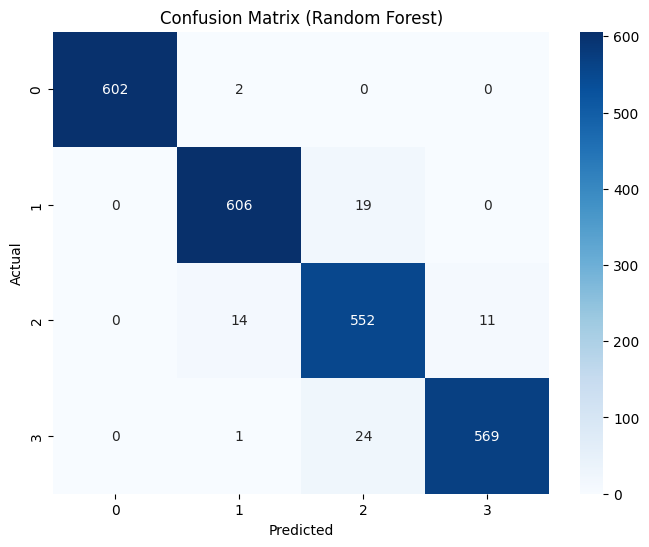


Gradient Boosting
Accuracy: 0.96
Precision: 0.960571459177905
Recall: 0.96
F1-score: 0.960130417793977

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       0.97      0.97      0.97       625
           2       0.90      0.94      0.92       577
           3       0.97      0.93      0.95       594

    accuracy                           0.96      2400
   macro avg       0.96      0.96      0.96      2400
weighted avg       0.96      0.96      0.96      2400



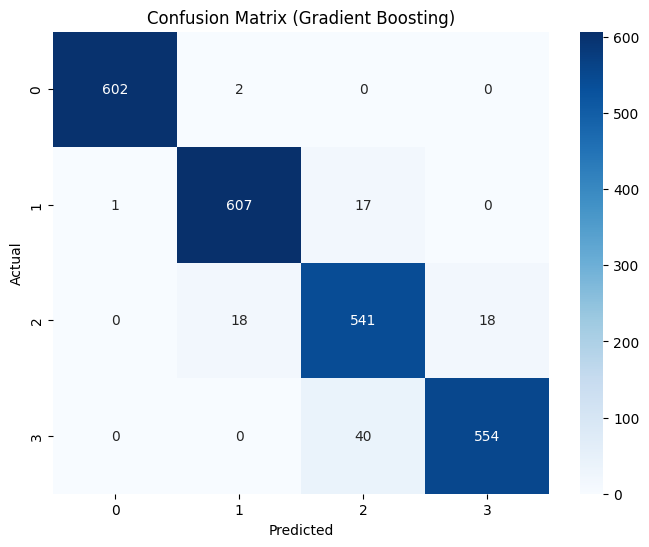


Naive Bayes
Accuracy: 0.9391666666666667
Precision: 0.9397710990425321
Recall: 0.9391666666666667
F1-score: 0.939330552776007

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       0.96      0.96      0.96       625
           2       0.86      0.89      0.88       577
           3       0.94      0.90      0.92       594

    accuracy                           0.94      2400
   macro avg       0.94      0.94      0.94      2400
weighted avg       0.94      0.94      0.94      2400



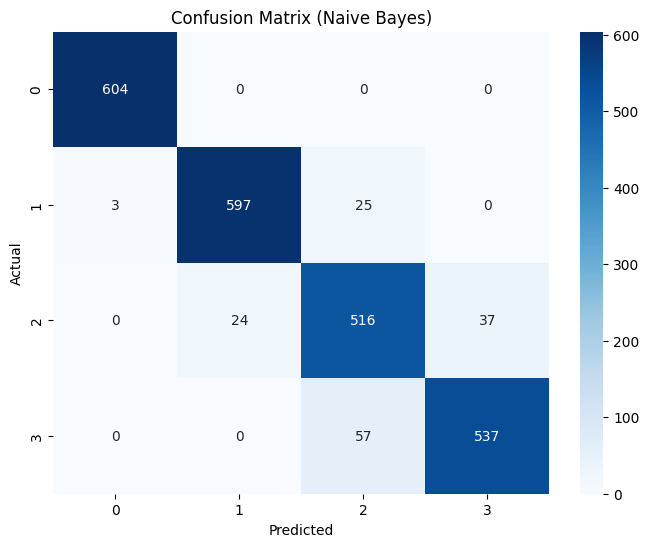


Decision Tree
Accuracy: 0.9245833333333333
Precision: 0.9246736680039576
Recall: 0.9245833333333333
F1-score: 0.9246008337873983

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       0.94      0.95      0.95       625
           2       0.84      0.85      0.85       577
           3       0.91      0.90      0.90       594

    accuracy                           0.92      2400
   macro avg       0.92      0.92      0.92      2400
weighted avg       0.92      0.92      0.92      2400



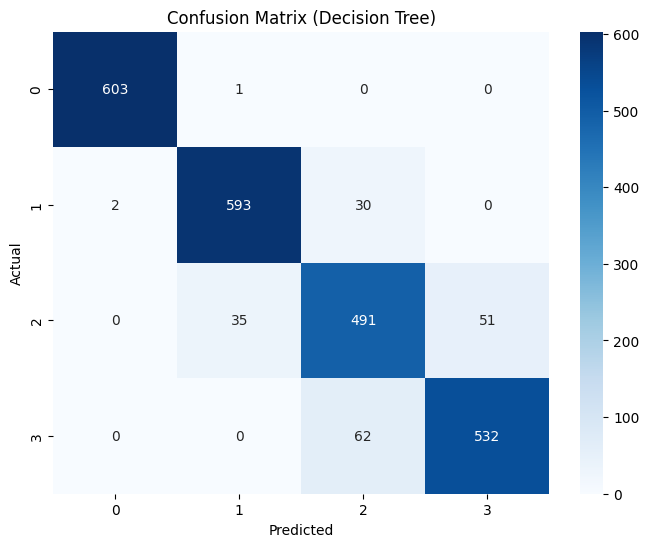

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt

x = df_resampled.drop('Air Quality', axis=1)
y = df_resampled['Air Quality']

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

def evaluate_model(name, model):
    print(f"\n{name}")
    print("=" * len(name))

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix ({name})")
    plt.show()

for name, model in models.items():
    evaluate_model(name, model)

# Hyperparameter Tuning

**Random Forest Classifier**


Random Forest hyperparameter tuning took 474.88 seconds

Evaluation for Random Forest:
  Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
  Accuracy: 0.9725
  Precision: 0.9727
  Recall: 0.9725
  F1-score: 0.9726
  Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       0.97      0.97      0.97       625
           2       0.94      0.95      0.95       577
           3       0.98      0.96      0.97       594

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400



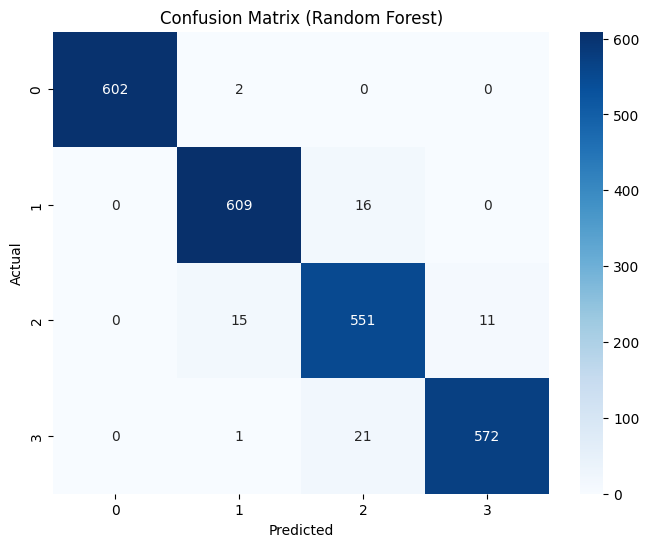

In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import time

rf_params = {
    'n_estimators': [50, 75, 100, 125, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)

rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_params,
    n_iter=50,
    cv=10,
    n_jobs=-1,
    random_state=42
)

start_time = time.time()
rf_search.fit(x_train, y_train)
elapsed_time = time.time() - start_time

print(f"\nRandom Forest hyperparameter tuning took {elapsed_time:.2f} seconds")

best_rf_params = rf_search.best_params_
best_rf_model = rf_search.best_estimator_

y_pred_rf = best_rf_model.predict(x_test)

print("\nEvaluation for Random Forest:")
print(f"  Best Parameters: {best_rf_params}")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"  F1-score: {f1_score(y_test, y_pred_rf, average='weighted'):.4f}")
print(f"  Classification Report:\n{classification_report(y_test, y_pred_rf)}")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

**Gradient Boosting Classifier**


Gradient Boosting hyperparameter tuning took 469.25 seconds

Evaluation for Gradient Boosting:
  Best Parameters: {'subsample': 0.9, 'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.1}
  Accuracy: 0.9692
  Precision: 0.9697
  Recall: 0.9692
  F1-score: 0.9693
  Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       604
           1       0.97      0.97      0.97       625
           2       0.92      0.96      0.94       577
           3       0.98      0.96      0.97       594

    accuracy                           0.97      2400
   macro avg       0.97      0.97      0.97      2400
weighted avg       0.97      0.97      0.97      2400



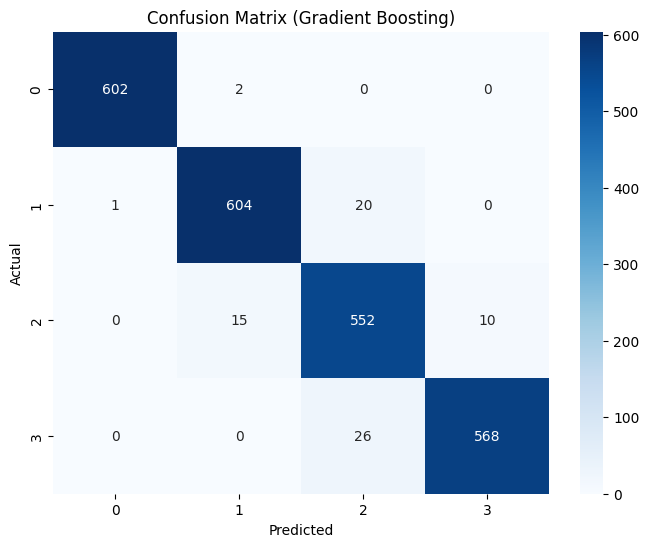

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import time

gb_params = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.2, 0.5, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gb_model = GradientBoostingClassifier(random_state=42)

gb_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gb_params,
    n_iter=10,
    cv=5,
    n_jobs=-1,
    random_state=42
)

start_time = time.time()
gb_search.fit(x_train, y_train)
elapsed_time = time.time() - start_time

print(f"\nGradient Boosting hyperparameter tuning took {elapsed_time:.2f} seconds")

best_gb_params = gb_search.best_params_
best_gb_model = gb_search.best_estimator_

y_pred_gb = best_gb_model.predict(x_test)

print("\nEvaluation for Gradient Boosting:")
print(f"  Best Parameters: {best_gb_params}")
print(f"  Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"  Precision: {precision_score(y_test, y_pred_gb, average='weighted'):.4f}")
print(f"  Recall: {recall_score(y_test, y_pred_gb, average='weighted'):.4f}")
print(f"  F1-score: {f1_score(y_test, y_pred_gb, average='weighted'):.4f}")
print(f"  Classification Report:\n{classification_report(y_test, y_pred_gb)}")

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Gradient Boosting)")
plt.show()